# TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

QUESTION



Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

##### Importing necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

###### Loading the dataset

In [4]:
#Importing the dataset
df = pd.read_csv('/content/Unemployment.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


Data Preprocessing

In [5]:
df.shape

(267, 9)

The unemployment dataset contains 267 instances and 9 variables.

In [7]:
#Renaming the column
df.rename(columns={'Region.1': 'Area'}, inplace=True)

Two columns has the same name Since we replaced Region.1 with Area which is more concise and clear.

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                      267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


We have 5 numerical variables and 4 categorical variables.



In [11]:
#removing unnecessary spaces from column
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Area                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


###### Converting data types

In [12]:
#converting data types
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                  int64
Estimated Labour Participation Rate (%)           float64
Area                                               object
longitude                                         float64
latitude                                          float64
dtype: object

###### Summary Statistics

In [13]:
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat

,count,unique,top,freq
Region,267,27,Andhra Pradesh,10
Frequency,267,1,M,267
Area,267,5,North,79


In [14]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


The mean estimated unemployment rate is high. The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.

###### Dropping irrelevent column

In [15]:
#dropping columns
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.74


###### Outlier detection

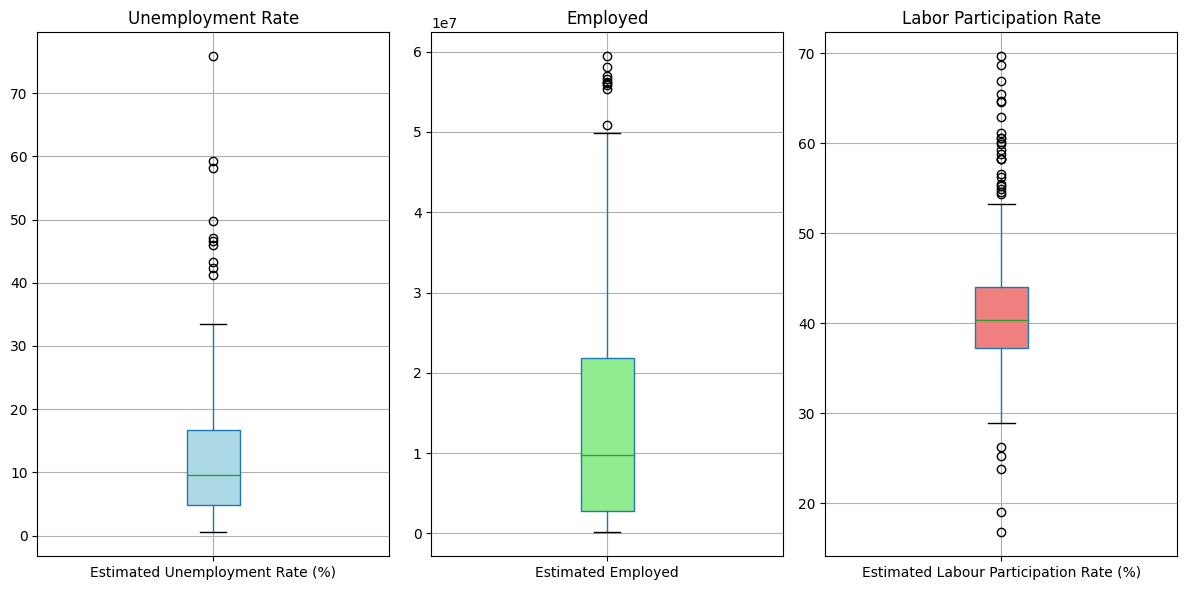

In [18]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

There are outliers in the dataset. Since we are analyzing the unemployment during Covid-19 the extreme values in the data are indicative of genuine structural changes or such events therefore we are not removing it.

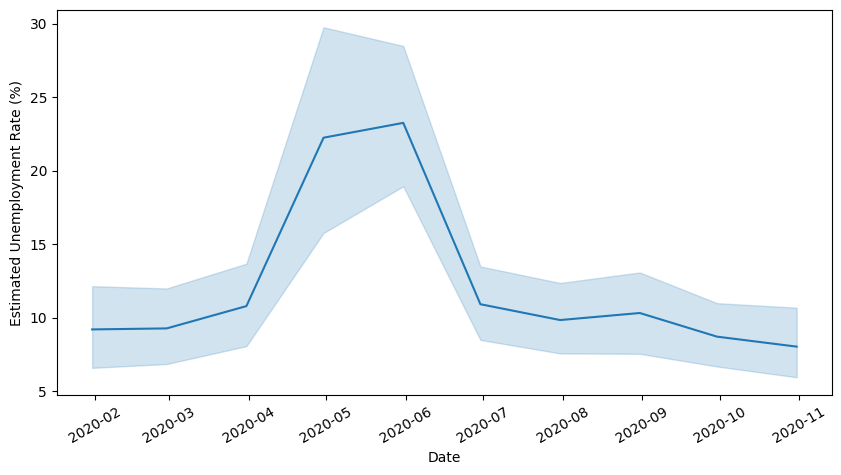

In [21]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=30)
plt.show()

The months of april, may, june witnessed high unemployment rate which can be associated with the lockdowns which lead to reduced economic activity and job losses in various sectors.

In [22]:
#unemployment based on each state
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

The estimated unemployment rate is highest in Haryana based on the above plot.

###### Composition of Labour Participation Rates by Region Over Time

In [23]:
fig = px.area(
    df,
    x='Date',
    y='Estimated Labour Participation Rate (%)',
    color='Region',
    labels={'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
    category_orders={'Region': df['Region'].unique()}  # Preserve the order of regions
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Labour Participation Rate (%)',
    legend_title='Region',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()

During the month of april labour participation declined all over India.

In [24]:
#extracting month from date
df['Month'] = df['Date'].dt.month
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,longitude,latitude,Month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,2
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,3
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,4
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,6
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,7
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,8
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,9


###### Percentage change in unemployment

In [25]:
# Filter data for months 1 to 3 (before lockdown)
before_lock = df[(df['Month'] >= 1) & (df['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

In [26]:
# Filter data for months 3 to 5 (after lockdown)
after_lock = df[(df['Month'] >= 3) & (df['Month'] < 6)][['Region', 'Estimated Unemployment Rate (%)']]

In [27]:
before_lock = before_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate before Lock-Down'})

In [28]:
after_lock = after_lock.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(
    columns={'Estimated Unemployment Rate (%)':'Unemployment Rate after Lock-Down'})

In [29]:
before_lock['Percentage Change in Unemployment'] = round((after_lock['Unemployment Rate after Lock-Down'] - before_lock['Unemployment Rate before Lock-Down']) / before_lock['Unemployment Rate before Lock-Down'], 2)

<Axes: xlabel='Percentage Change in Unemployment', ylabel='Region'>

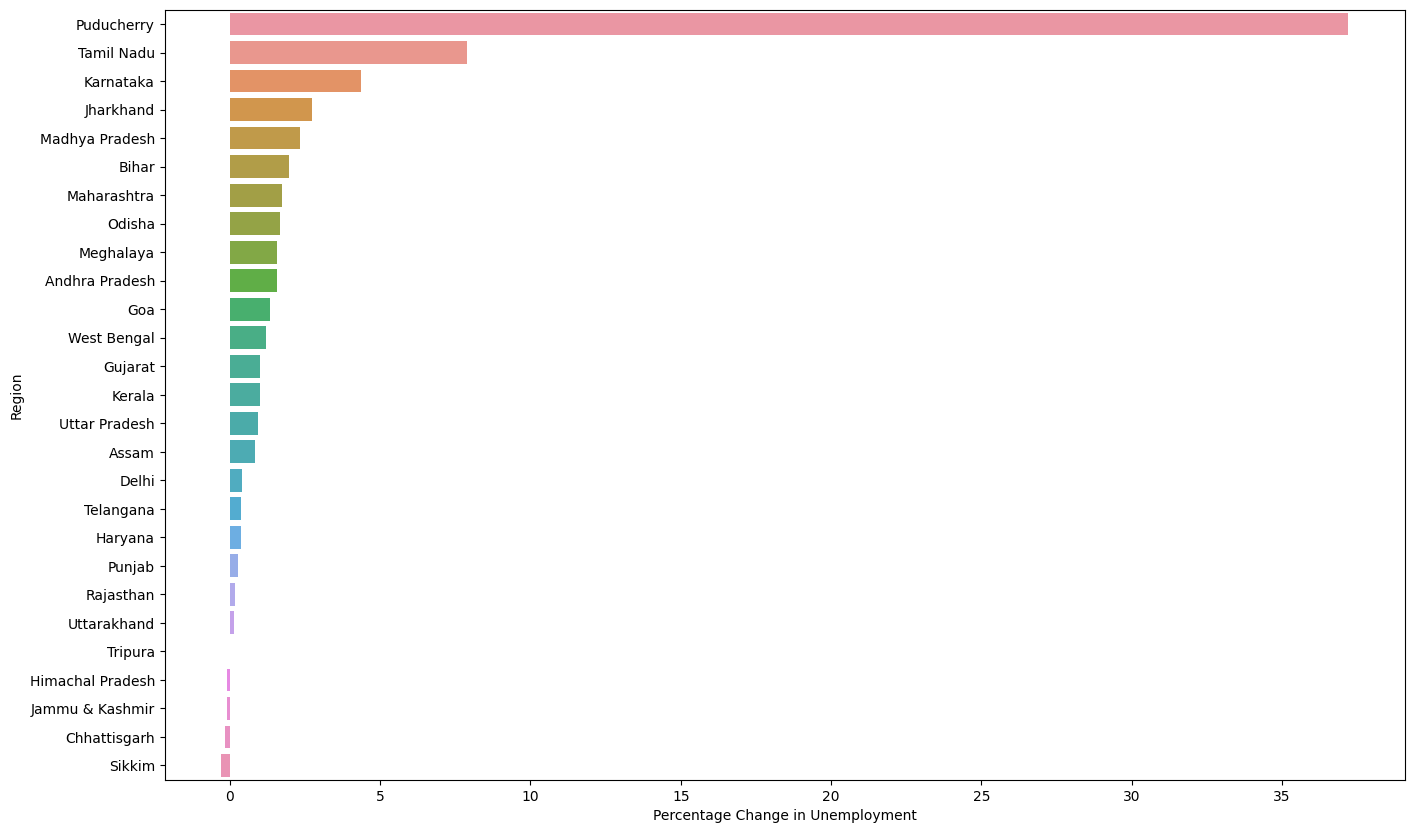

In [30]:
plot_df = before_lock.sort_values('Percentage Change in Unemployment', ascending=False)
plt.figure(figsize=(16, 10))
sns.barplot(data=plot_df, y='Region', x='Percentage Change in Unemployment')

If the percentage change is positive, it means that unemployment has increased by compared to the previous period which means more people are unemployed and vice versa. A larger percentage change suggests a more substantial shift in unemployment rates compared to a smaller percentage change.

Puducherry's unemployment rate had been seriously impacted by the lock-down.

Sikkim, Chattisgarh, Jammu & Kashmir and Himachal Pradesh have negetive percentage change.That means these states are not highly impacted by the lock down.